## Wine Quality Analysis with Random Forest Classifier

### Group : CS-20
### Team members: Abdullazada Anar, Abdulkhaligov Habil, Khidilov Turan
### Teacher : Pierre Collet

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix, average_precision_score,roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.inspection import PartialDependenceDisplay
import warnings
warnings.filterwarnings('ignore')

In [2]:
red_wine = pd.read_csv('winequality-red_NO_ALCOHOL.csv',sep = ';')

In [3]:
white_wine = pd.read_csv('winequality-white_NO_ALCOHOL.csv',sep = ';')

In [4]:
# To be able to differentiate different datasets

red_wine['Type'] = 'Red'
white_wine['Type'] = 'White'

In [5]:
df = pd.concat([red_wine,white_wine],axis = 0)

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,Red


In [7]:
df.shape

(6497, 12)

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
quality                   int64
Type                     object
dtype: object

### Exploratory Data Analysis and Visualization

In [9]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
quality                 False
Type                    False
dtype: bool

In [ ]:
# As we can see above, we have no null values

In [10]:
# Let's see if there are any duplicated rows

duplicated_rows = df.duplicated()
print(df[duplicated_rows].shape)
df[duplicated_rows].head()

(1191, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,Type
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,5,Red
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.9978,3.35,0.80,5,Red
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.9966,3.17,0.91,5,Red
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,5,Red
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,5,Red


In [11]:
# Let's remove those duplicated rows since tey don't contribute model preformance.

df.drop_duplicates(inplace = True)

In [12]:
df.shape

(5306, 12)

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000
mean,7.217650,0.343981,0.318575,5.048869,0.056705,30.025254,114.083867,0.994538,3.224561,0.533221,5.794572
std,1.320169,0.168064,0.147214,4.503590,0.036898,17.812523,56.812829,0.002967,0.160408,0.149804,0.879988
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994670,3.210000,0.510000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.000000,0.996777,3.330000,0.600000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,9.000000


### Viualization

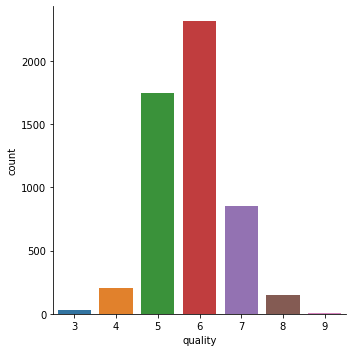

In [107]:
# number of values for each quality
sns.catplot(x='quality', data = df, kind = 'count')

In [108]:
df['quality'].value_counts()

6    2316
5    1750
7     851
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

In [ ]:
# As we see, our data mainly contains '5' and '6' classes.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

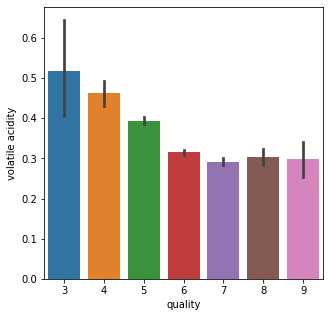

In [109]:
# Volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = df)

In [ ]:
# Here we can see an example to negative correlation that exist between volatile acidity and quality.

<AxesSubplot:xlabel='quality', ylabel='pH'>

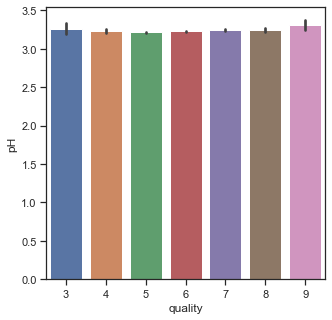

In [131]:
# pH vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'pH', data = df)

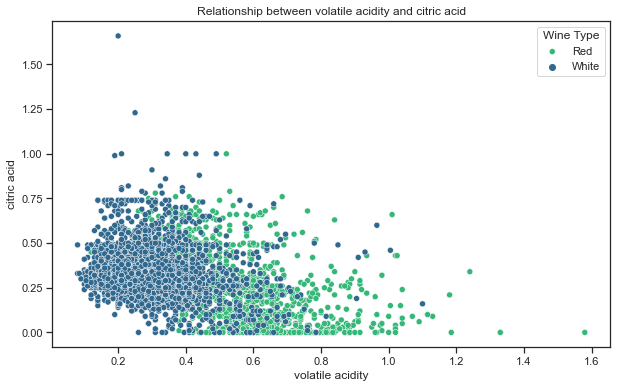

In [170]:
# scatter plot for volatile acid and citric acid 

plt.figure(figsize=(10, 6))
sns.scatterplot(x='volatile acidity', y='citric acid', data=df,hue = 'Type', palette='viridis')
plt.title('Relationship between volatile acidity and citric acid')
plt.xlabel('volatile acidity')
plt.ylabel('citric acid')
plt.legend(title='Wine Type', loc='upper right', labels=['Red', 'White'])
plt.show()

In [ ]:
# Similarly, this example shows positive correlation between pH and quality 

### Distribution

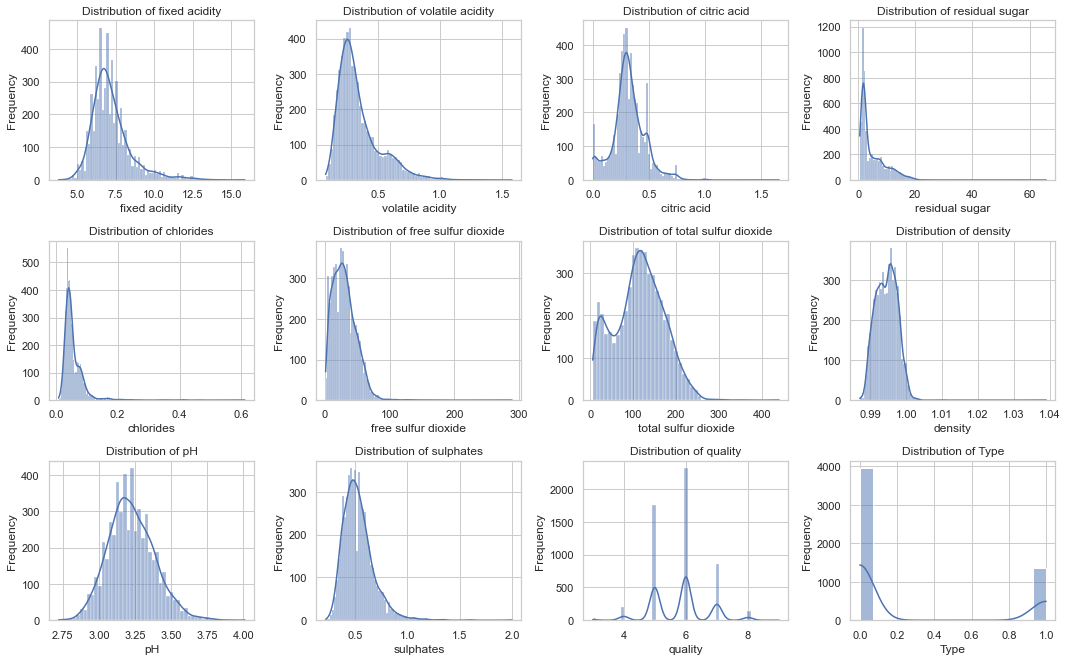

In [110]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))

# Flattening the axes
axes = axes.flatten()

# Plotting distribution graphs
for i, feature in enumerate(df.columns):
    if i < len(axes):
        sns.histplot(df[feature], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

# Removing empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjusting layout for better look
plt.tight_layout()
plt.show()

In [ ]:
# According to these histograms, we are able to get insights on distribution of numerical features
# where most of the more right-skewed.

### Correlation

In [112]:
# Let's first display the correlation matrix

corr_graph = df.corr()
corr_graph

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,Type
fixed acidity,1.000000,0.214956,0.330981,-0.104721,0.288584,-0.281575,-0.327624,0.477763,-0.271220,0.306081,-0.079111,0.486948
volatile acidity,0.214956,1.000000,-0.383322,-0.163621,0.367428,-0.349322,-0.401289,0.307898,0.246231,0.227251,-0.266015,0.644759
citric acid,0.330981,-0.383322,1.000000,0.145725,0.055616,0.130241,0.194419,0.095262,-0.344053,0.060419,0.098578,-0.182329
residual sugar,-0.104721,-0.163621,0.145725,1.000000,-0.123301,0.398815,0.487527,0.521228,-0.234323,-0.174593,-0.057197,-0.328774
chlorides,0.288584,0.367428,0.055616,-0.123301,1.000000,-0.186350,-0.269953,0.371376,0.025953,0.405548,-0.201817,0.499457
free sulfur dioxide,-0.281575,-0.349322,0.130241,0.398815,-0.186350,1.000000,0.720652,0.006763,-0.140993,-0.198122,0.053828,-0.465105
total sulfur dioxide,-0.327624,-0.401289,0.194419,0.487527,-0.269953,0.720652,1.000000,0.007055,-0.222492,-0.275851,-0.050085,-0.694544
density,0.477763,0.307898,0.095262,0.521228,0.371376,0.006763,0.007055,1.000000,0.034226,0.283282,-0.326521,0.429187
pH,-0.271220,0.246231,-0.344053,-0.234323,0.025953,-0.140993,-0.222492,0.034226,1.000000,0.167208,0.039049,0.310335
sulphates,0.306081,0.227251,0.060419,-0.174593,0.405548,-0.198122,-0.275851,0.283282,0.167208,1.000000,0.041083,0.490118


<AxesSubplot:>

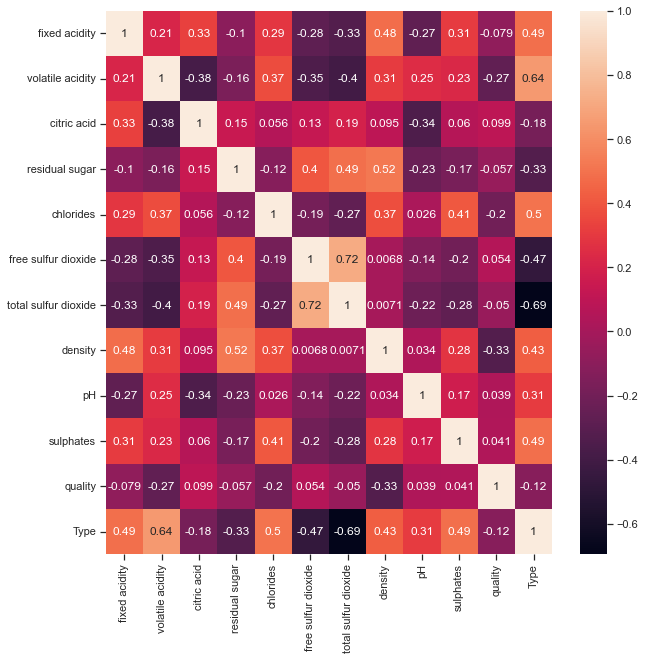

In [158]:
# Heatmap

plt.figure(figsize = (10,10))
sns.heatmap(corr_graph,annot = True)

### Pairplot

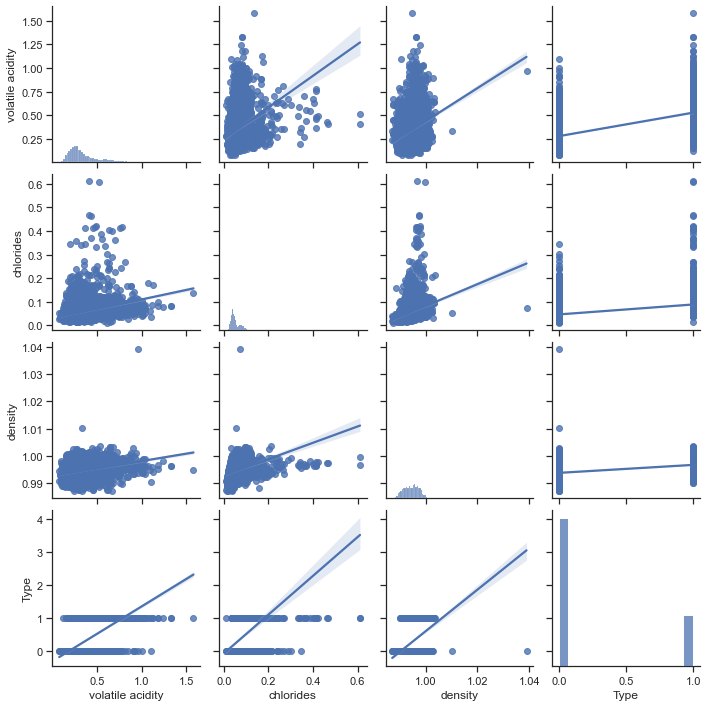

In [125]:
sns.set(style="ticks")

# Creating a pairplot
sns.pairplot(df[['volatile acidity','chlorides','density','Type']],kind = 'reg')
plt.show()

In [ ]:
# After obtaining heatmap, we can take a look at the pairplot of some columns are highly correlated
# because we have 10 columns and plotting each of them can lead confusion and mess.

### Outliers

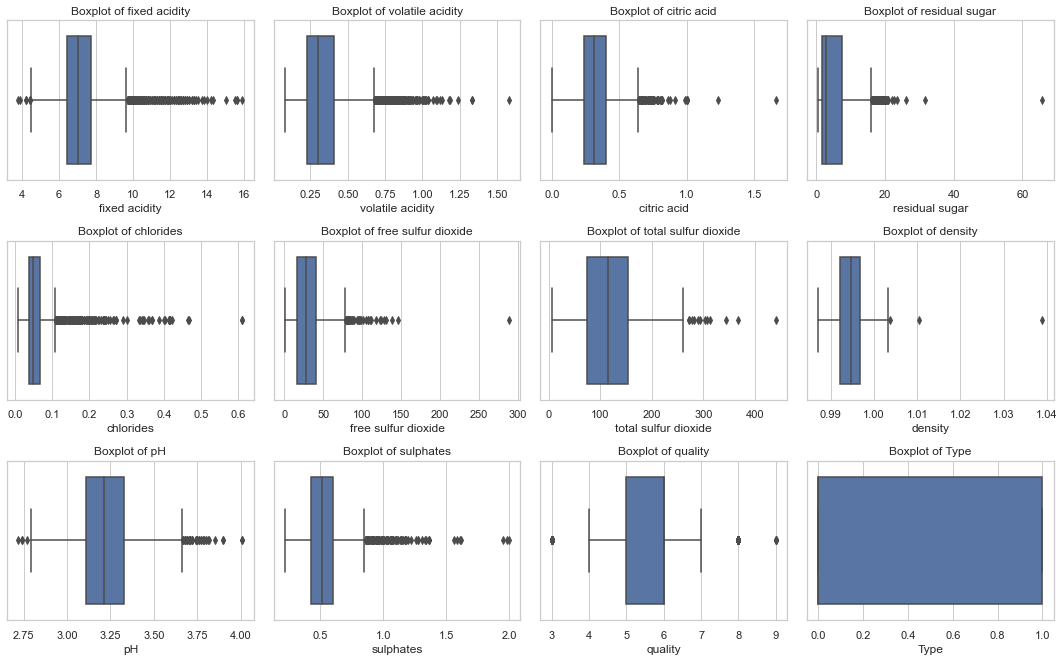

In [111]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))

# Flatten the axes
axes = axes.flatten()

# Plotting boxplots
for i, feature in enumerate(df.columns):
    if i < len(axes): 
        sns.boxplot(x=df[feature], ax=axes[i])
        axes[i].set_title(f'Boxplot of {feature}')

# Removing empty plots if there is any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# By looking at the boxplots, we can have an information on outliers that exist in data.
# However, we will use RandomForestClassifier and as it is resistant to outliers and
# feature distribution, we don't need to handle them. We will witness this in the model performance.

### Regrouping target classes

In [ ]:
# Our target value contains 7 different classes. Some of the classes like '3','4','9' etc. make up very few 
# percentage. In order to handle this imbalance, we first need to regroup classes as 'low':0, 'medium':1 and 'high':2
# as shown below

In [14]:
Y = df['quality'].apply(lambda y_value: 2 if y_value in (8,9) else (1 if y_value in (5,6, 7) else 0))

In [ ]:
# As we see, there is still imbalance in our dataset. But we are going to handle it in further step.

In [15]:
Y.value_counts()

1    4917
0     236
2     153
Name: quality, dtype: int64

In [16]:
# Let's apply label encoding to Type column to have numerical values.

df['Type'] = df['Type'].map({'Red':1, 'White':0})

### Train | Test Split

In [17]:
X = df.drop('quality',axis = 1)

In [138]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42,stratify = Y)

### Redundant Features

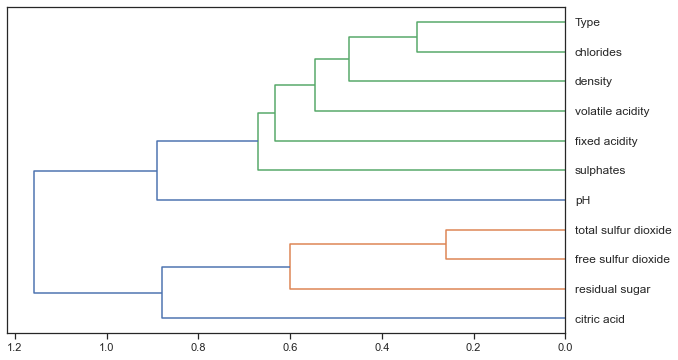

In [220]:
import fastbook
fastbook.cluster_columns(X_train)

In [ ]:
# This graph shows that there are no high-correlated features in the data. For this reason,
# there is no need to remove any of the features.

### SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
# In this step, we will use SMOTE oversamplling method in order to have balanced dataset.

In [139]:
from imblearn.over_sampling import SMOTE

In [140]:
smote = SMOTE(sampling_strategy='auto', random_state=42)


In [141]:
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [150]:
Y_train_resampled.value_counts()

1    3687
0    3687
2    3687
Name: quality, dtype: int64

In [ ]:
# So consequently, we got balanced dataset and we can start building our model.

### Random Forest Classifier 

In [ ]:
# First, we will build a quick model for testing in order to quickly confirm 
# if it is needed any changes to our model or code.

In [142]:
rf = RandomForestClassifier(n_jobs = -1)

In [116]:
rf.fit(X_train_resampled,Y_train_resampled)

RandomForestClassifier(n_jobs=-1)

In [117]:
print(classification_report(Y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.25      0.34      0.29        59
           1       0.94      0.91      0.93      1230
           2       0.10      0.13      0.11        38

    accuracy                           0.87      1327
   macro avg       0.43      0.46      0.44      1327
weighted avg       0.89      0.87      0.88      1327



In [118]:
print(classification_report(Y_train,rf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      1.00      1.00      3687
           2       1.00      1.00      1.00       115

    accuracy                           1.00      3979
   macro avg       1.00      1.00      1.00      3979
weighted avg       1.00      1.00      1.00      3979



In [ ]:
# According to the model performance on train and test data, we clearly observe overfitting problem.
# Because model perfectly performs on train data showing 100% performance while it shows worse performance
# test data. As a result, it indicates overfitting. 

### Model Tuning

In [ ]:
# Let's do hyperparameter tuning to optimize our model

In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [132]:
random_grid = {
    'n_estimators': [100,150, 200, 300], # number of the decision trees
    'max_depth': [10, 20,30, None],     # maximum depth of each tree
    'min_samples_split': [2, 5, 10],    # minimum number of samples needed to split internal node
    'min_samples_leaf': [2, 5, 6],     # minimum number of samples needed to be at a leaf node.

}


In [133]:
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [143]:
rf_random.fit(X_train_resampled,Y_train_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [2, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200, 300]},
                   random_state=42, verbose=2)

In [151]:
# Parameters obtained from tuning

rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': None}

In [144]:
rf_search = rf_random.best_estimator_

In [145]:
print(classification_report(Y_test,rf_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.23      0.37      0.29        59
           1       0.94      0.90      0.92      1230
           2       0.09      0.13      0.11        38

    accuracy                           0.86      1327
   macro avg       0.42      0.47      0.44      1327
weighted avg       0.89      0.86      0.87      1327



In [146]:
print(classification_report(Y_train,rf_search.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       177
           1       1.00      1.00      1.00      3687
           2       0.96      1.00      0.98       115

    accuracy                           1.00      3979
   macro avg       0.97      0.99      0.98      3979
weighted avg       1.00      1.00      1.00      3979



### Learning curve

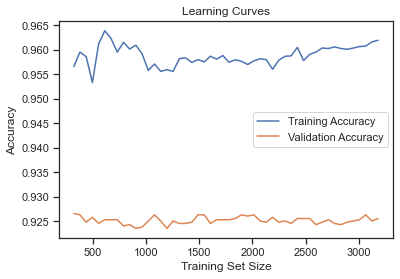

In [147]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(rf_search, X_train, Y_train, cv=5,scoring = 'accuracy', train_sizes=np.linspace(0.1, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, val_mean, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


In [ ]:
# By looking at the results on learning curve (huge gap between curves) and classification report, we can see that 
# we are still facing overfitting problem. 

### Manual tuning

In [ ]:
# Since hyperparameter tuning didn't help to overcome overfitting,
# we will try to solve this issue by manually adjusting the parameters.

In [98]:
rf_best = RandomForestClassifier(n_estimators=150, 
                                   min_samples_split=5, 
                                   min_samples_leaf=5,  
                                   max_depth=30)

In [99]:
rf_best.fit(X_train_resampled, Y_train_resampled)

RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=150)

In [100]:
print(classification_report(Y_test,rf_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.22      0.44      0.29        59
           1       0.94      0.87      0.91      1230
           2       0.09      0.18      0.12        38

    accuracy                           0.83      1327
   macro avg       0.42      0.50      0.44      1327
weighted avg       0.89      0.83      0.86      1327



In [101]:
print(classification_report(Y_train,rf_best.predict(X_train)))

              precision    recall  f1-score   support

           0       0.71      0.95      0.82       177
           1       1.00      0.97      0.98      3687
           2       0.66      0.98      0.79       115

    accuracy                           0.97      3979
   macro avg       0.79      0.97      0.86      3979
weighted avg       0.97      0.97      0.97      3979



### Learning curve

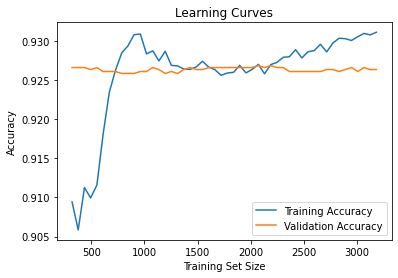

In [106]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(rf_best, X_train, Y_train, cv=5,scoring = 'accuracy', train_sizes=np.linspace(0.1, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, val_mean, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


In [ ]:
# Finally, we managed to have well performed model.

### Cross-validation 

In [152]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_best,X_test,Y_test, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.92481203 0.92481203 0.92830189 0.92830189 0.92830189]
Mean CV Accuracy: 0.9269059441055469


In [ ]:
# Using cross-validation technique, we got more reliable result on accuracy of our model.

### Saving model

In [ ]:
# We can save our model after all the changes in order to keep it for future needs.

In [115]:
import pickle

filename = 'best.pkl'

with open(filename, 'wb') as file:
    pickle.dump(rf_best, file)
    
#Load the Model back from file

# with open('best.pkl', 'rb') as file:  
#     Pickled_RF_Model = pickle.load(file)

# Pickled_RF_Model

### Feature importance

In [153]:
rf_best.feature_importances_

array([0.06465853, 0.09091141, 0.06667349, 0.08427449, 0.12087686,
       0.14943652, 0.12471916, 0.13317401, 0.06087324, 0.07976695,
       0.02463535])

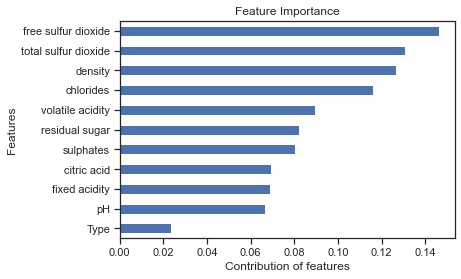

In [179]:
feat_importances = pd.Series(rf_search.feature_importances_,index =X_train.columns)
feat_importances.sort_values().plot(kind="barh")

plt.title('Feature Importance')
plt.xlabel('Contribution of features')
plt.ylabel('Features')
plt.show()

In [ ]:
# Here we can see graph representing importance score of features. We can conclude that 'free sulfur dioxide'
# plays more significant role in model's decisions.

### Partial Dependence

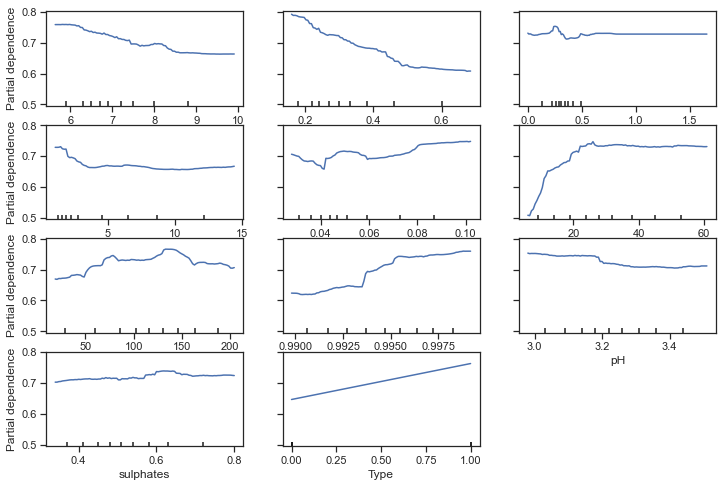

In [201]:
feature_names = [i for i in X_train.columns]

fig, ax = plt.subplots(figsize=(12, 8))
display = PartialDependenceDisplay.from_estimator(rf_best, X_train,features = range(11),target = 1, feature_names=feature_names, ax=ax)
plt.show()

In [ ]:
# Partial dependence plots give us insights on how each feature affects to target
# We plotted only for class 1 as an example which is mentioned in "target = 1"

In [202]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'Type'],
      dtype='object')

### Confidence of prediction

In [214]:
# Let's take an example from test data for prediction.

sample = pd.DataFrame(X_test.iloc[1,:]).transpose()
sample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,Type
1753,7.4,0.23,0.25,1.4,0.049,43.0,141.0,0.9934,3.42,0.54,0.0


In [216]:
sample_probabilities = rf_best.predict_proba(sample)

print('0 class probability: ', sample_probabilities[:,0])
print('1 class probability: ', sample_probabilities[:,1])
print('2 class probability: ', sample_probabilities[:,2])

0 class probability:  [0.03342535]
1 class probability:  [0.90977306]
2 class probability:  [0.05680159]


In [ ]:
# Consequently, we are 90% sure that this wine sample corresponds to class 1 which is medium quality.